In [82]:
import gym
from gym import envs
env = v

In [83]:
env.reset()

332

In [84]:
env.reset()
for _ in range(10):
    env.render()
    observation, reward, done, info = env.step(env.action_space.sample()) # take a random action
    
    print(observation, reward, done, info)
env.close()
print('hello')
env.step(env.action_space.sample())
env.render()
env.env.s
#env.reward

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

114 -1 False {'prob': 1.0}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
114 -1 False {'prob': 1.0}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
214 -1 False {'prob': 1.0}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
114 -1 False {'prob': 1.0}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
114 -10 False {'prob': 1.0}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
14 -1 False {'prob': 1.0}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
14 -10 False {'prob': 1.0}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
14 -10 False {'prob': 1.0}
+---------+
|R: | : :G|
| : | : : |
| :

34

In [85]:
env.observation_space.n

500

In [86]:
import numpy as np

In [87]:
from typing import Dict
class QTable:
    def __init__(self, env):
        self.n_observations = env.observation_space.n
        self.n_actions = env.action_space.n
        self.table = np.zeros((self.n_observations, self.n_actions))
        
    def get_action(self, state, epsilon=0.0):
        if np.random.rand() < epsilon:
            return np.random.randint(0, self.n_actions)
        else:
            rewards = self.table[state]
            best_action = np.argmax(rewards)
            return best_action
    
    def learn(self, prev_state, next_state, action, reward, alpha=0.1, gamma=0.5):
        q = self.table
        ps = prev_state
        nx = next_state
        a = action
        q[ps, a] = q[ps, a] + alpha*(reward + gamma*np.max(q[ns]) - q[ps, a])


In [88]:
np.random.seed(333)
env = gym.make('Taxi-v3')
q_table = QTable(env)
alpha = 0.1
gamma = 0.5
epsilon = 0.5
for episode in range(100000):
    env.reset()
    total_score = 0
    for turn in range(200):
        ps = env.env.s
        action = q_table.get_action(ps, epsilon=epsilon)
        ns, reward, done, info = env.step(action)
        total_score += reward
        q_table.learn(ps, ns, action, reward, alpha=alpha, gamma=gamma)
        if done:
            break
    if episode%1000 == 0:
        print(episode, total_score)

0 -668
1000 -142
2000 -179
3000 -47
4000 5
5000 -72
6000 -69
7000 -8
8000 -77
9000 -85
10000 -53
11000 -30
12000 -92
13000 -36
14000 -13
15000 -92
16000 -80
17000 -37
18000 -43
19000 -11
20000 -61
21000 -32
22000 -10
23000 -80
24000 -24
25000 -36
26000 -30
27000 -38
28000 -18
29000 -70
30000 -46
31000 -21
32000 -37
33000 -18
34000 -4
35000 -28
36000 -48
37000 -41
38000 -57
39000 -53
40000 -26
41000 -78
42000 -44
43000 -91
44000 -31
45000 -9
46000 -15
47000 -7
48000 -18
49000 -12
50000 -31
51000 -41
52000 -88
53000 -1
54000 11
55000 8
56000 -19
57000 -79
58000 -104
59000 -45
60000 -178
61000 -65
62000 8
63000 -90
64000 -77
65000 -40
66000 -3
67000 -39
68000 -39
69000 -39
70000 -47
71000 -73
72000 -41
73000 8
74000 -62
75000 -24
76000 -53
77000 -71
78000 6
79000 -52
80000 -93
81000 -16
82000 -62
83000 -4
84000 7
85000 -82
86000 -43
87000 -27
88000 -61
89000 -30
90000 -85
91000 -10
92000 -74
93000 -58
94000 -111
95000 -54
96000 -56
97000 -50
98000 -37
99000 -139


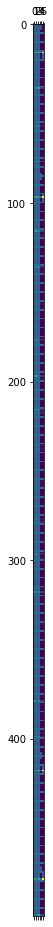

In [67]:
from matplotlib import pyplot as plt
plt.matshow(q_table.table)

In [91]:
from IPython.display import clear_output
import time

env.reset()
env.render()
time.sleep(0.5)
clear_output(True)
for i in range(200):
    ps = env.env.s
    action = q_table.get_action(ps, epsilon=0.0)
    o, r, d, _ = env.step(action)
    env.render()
    print(i, action, ps)
    if d:
        break
    time.sleep(0.5)
    clear_output(True)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
11 5 16
